In [2]:
import pandas as pd 
import os
import matplotlib.pyplot as plt 

## Lendo o dataset da camada gold

In [3]:
YEAR = 2025

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

datalake_dir = os.path.join(project_root, "datalake", "gold")

os.makedirs(datalake_dir, exist_ok=True)

read_path = os.path.join(datalake_dir, f"srag_gold_notebook_{YEAR}.csv") 

df = pd.read_csv(read_path, sep=",") 

df.head()

,DT_NOTIFIC,AVE_SUINO,FEBRE,DISPNEIA,DESC_RESP,FATOR_RISC,VACINA,ANTIVIRAL,UTI,EVOLUCAO,SURTO_SG
0,2024-12-29,"Não, nenhum",Campo vazio,Sim,Campo vazio,Sim,Não,Não,Não,Cura,Não
1,2024-12-29,"Não, nenhum",Não,Sim,Sim,Campo vazio,Não,Não,Campo vazio,Cura,Não
2,2024-12-29,"Não, nenhum",Não,Sim,Sim,Sim,Não,Sim,Sim,Óbito,Não
3,2024-12-30,"Não, nenhum",Não,Não,Sim,Sim,Não,Não,Sim,Cura,Campo vazio
4,2024-12-30,Ignorado,Sim,Não,Não,Sim,Sim,Não,Não,Cura,Ignorado


Esse gráifico mostra a relação com a quantidade dos casos de Síndrome Respiratória Aguda Grave (SRAG) notificados nos últimos 30 dias desse dataset.

Text(0, 0.5, 'Quantidade')

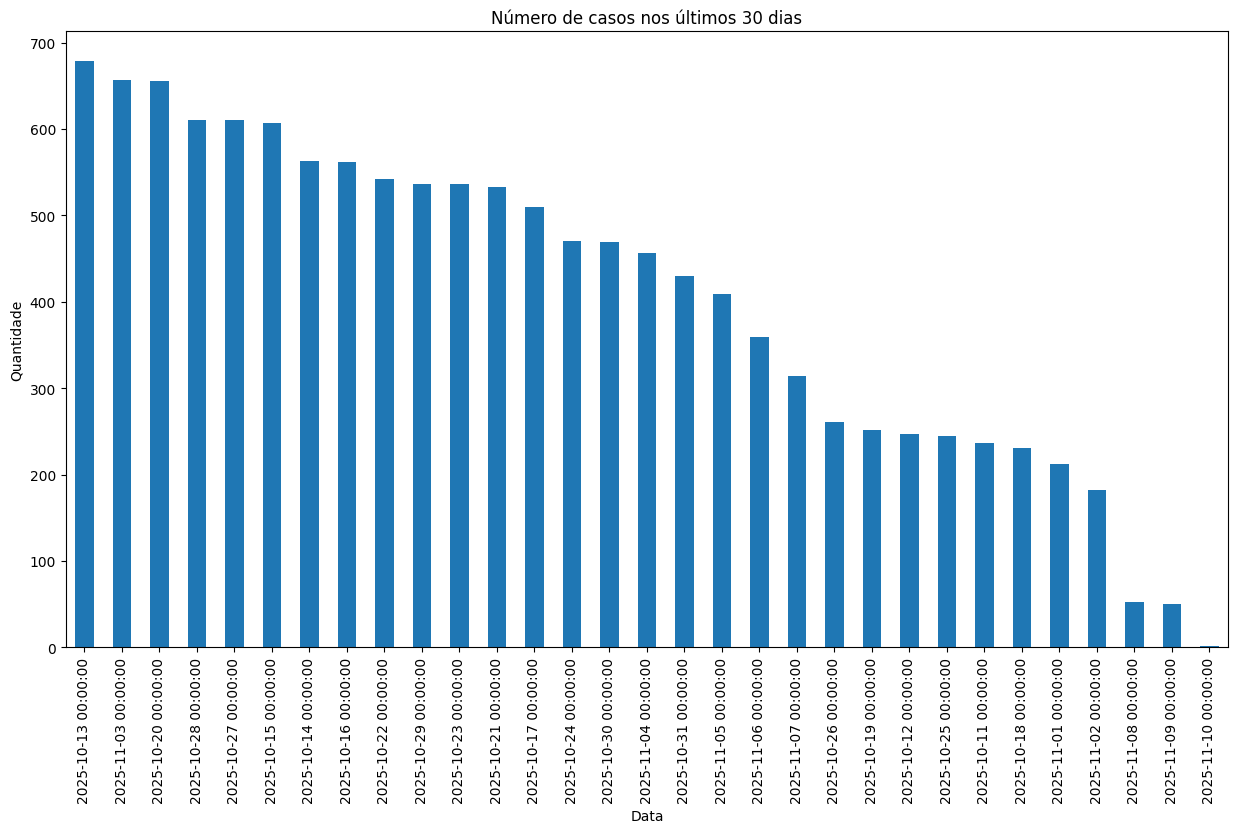

In [7]:
df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'])

end_date = df['DT_NOTIFIC'].max()
start_date = end_date - pd.Timedelta(days=30)

filter = (df['DT_NOTIFIC'] >= start_date) & (df['DT_NOTIFIC'] <= end_date)

df_last_30_days = df['DT_NOTIFIC'][filter].value_counts()

plt.figure(figsize=(15,8))

plt.title("Número de casos nos últimos 30 dias")
df_last_30_days.plot(kind='bar')
plt.xlabel("Data")
plt.ylabel("Quantidade")


Esse gráifico mostra a relação com a quantidade dos casos de Síndrome Respiratória Aguda Grave (SRAG) notificados nos últimos 30 dias desse dataset.

Text(0, 0.5, 'Quantidade')

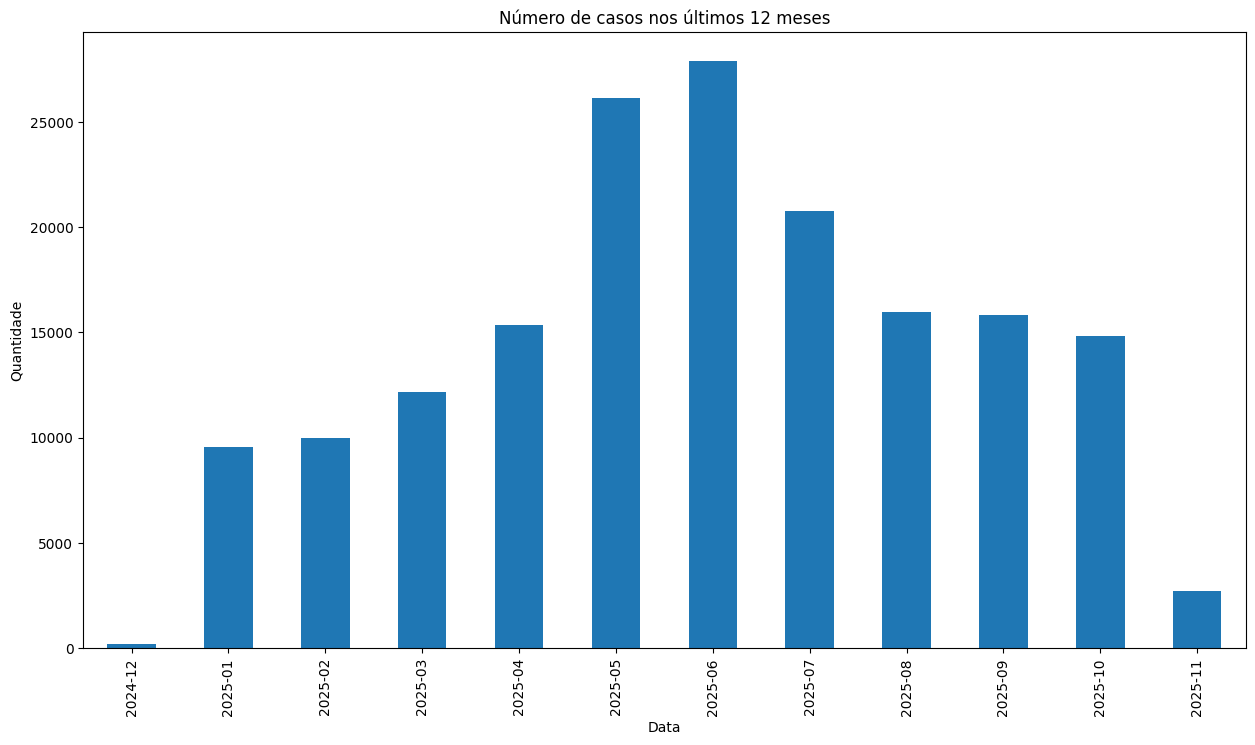

In [ ]:
df['DT_NOTIFIC'] = pd.to_datetime(df['DT_NOTIFIC'])

end_date = df['DT_NOTIFIC'].max()
start_date = end_date - pd.DateOffset(months=12)

filter = (df['DT_NOTIFIC'] >= start_date) & (df['DT_NOTIFIC'] <= end_date)


df_last_12_months = df[filter]

monthly_counts = df_last_12_months.groupby(
        df_last_12_months['DT_NOTIFIC'].dt.strftime('%Y-%m')
    ).size()

plt.figure(figsize=(15,8))

plt.title("Número de casos nos últimos 12 meses")
monthly_counts.plot(kind='bar')
plt.xlabel("Data")
plt.ylabel("Quantidade")